# Overfitting

## 0. Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import joblib
import matplotlib.pyplot as plt


## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
data = pd.read_csv('data/dayofweek.csv')

In [3]:
X = data.drop(columns=['dayofweek'])
y = data['dayofweek']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [5]:
print('Распределение классов без стратификации:')
print('Train:', y_train.value_counts(normalize=True))
print('Test:', y_test.value_counts(normalize=True))

Распределение классов без стратификации:
Train: dayofweek
3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
0    0.077893
4    0.059347
Name: proportion, dtype: float64
Test: dayofweek
3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
4    0.071006
2    0.071006
Name: proportion, dtype: float64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [7]:
print('\nРаспределение классов со стратификацией:')
print('Train:', y_train.value_counts(normalize=True))
print('Test:', y_test.value_counts(normalize=True))


Распределение классов со стратификацией:
Train: dayofweek
3    0.234421
6    0.211424
1    0.162463
5    0.160979
2    0.088279
0    0.080861
4    0.061573
Name: proportion, dtype: float64
Test: dayofweek
3    0.236686
6    0.210059
1    0.162722
5    0.159763
2    0.088757
0    0.079882
4    0.062130
Name: proportion, dtype: float64


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [8]:
logreg = LogisticRegression(random_state=21)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logreg: Accuracy = {accuracy_logreg}')

Logreg: Accuracy = 0.6272189349112426


### b. SVM

In [9]:
svm = SVC(random_state=21)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM: Accuracy = {accuracy_svm}')

SVM: Accuracy = 0.8461538461538461


### c. Decision tree

In [10]:
decision_tree = DecisionTreeClassifier(random_state=21)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_tree

0.8668639053254438

### d. Random forest

In [11]:
random_forest = RandomForestClassifier(random_state=21)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Random Forest: Accuracy = {accuracy_forest}')

Random Forest: Accuracy = 0.9378698224852071


In [12]:
print(f'{accuracy_logreg} - logred')
print(f'{accuracy_svm} - SVM')
print(f'{accuracy_tree} - Decision Tree')
print(f'{accuracy_forest} - Random Forest')

0.6272189349112426 - logred
0.8461538461538461 - SVM
0.8668639053254438 - Decision Tree
0.9378698224852071 - Random Forest


random forest

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [13]:
logreg = LogisticRegression(solver='liblinear', random_state=21)
logreg.fit(X_train, y_train)
cv_scores_logreg = cross_val_score(logreg, X_train, y_train, cv=10)
mean_logreg = np.mean(cv_scores_logreg)
std_logreg = np.std(cv_scores_logreg)
print(f'Logreg: Mean Accuracy = {mean_logreg}, Std Dev = {std_logreg}')

Logreg: Mean Accuracy = 0.5905251520176893, Std Dev = 0.022758910083794055


### b. SVM

In [14]:
cv_scores_svm = cross_val_score(svm, X_train, y_train, cv=10)
mean_svm = np.mean(cv_scores_svm)
std_svm = np.std(cv_scores_svm)
print(f'SVM: Mean Accuracy = {mean_svm}, Std Dev = {std_svm}')

SVM: Mean Accuracy = 0.7833333333333333, Std Dev = 0.026300721045753594


### c. Decision tree

In [15]:
cv_scores_tree = cross_val_score(decision_tree, X_train, y_train, cv=10)
mean_tree = np.mean(cv_scores_tree)
std_tree = np.std(cv_scores_tree)
print(f'Decision Tree: Mean Accuracy = {mean_tree}, Std Dev = {std_tree}')

Decision Tree: Mean Accuracy = 0.8887009397457157, Std Dev = 0.02185758108705732


### d. Random forest

In [16]:
cv_scores_forest = cross_val_score(random_forest, X_train, y_train, cv=10)
mean_forest = np.mean(cv_scores_forest)
std_forest = np.std(cv_scores_forest)
print(f'Random Forest: Mean Accuracy = {mean_forest}, Std Dev = {std_forest}')

Random Forest: Mean Accuracy = 0.9124599226091764, Std Dev = 0.01811475713890213


In [17]:
print(f'Mean = {mean_logreg}, Std Dev = {std_logreg} - Logreg')
print(f'Mean = {mean_svm}, Std Dev = {std_svm} - SVM')
print(f'Mean = {mean_tree}, Std Dev = {std_tree} - Decision Tree')
print(f'Mean = {mean_forest}, Std Dev = {std_forest} - Random Forest')

Mean = 0.5905251520176893, Std Dev = 0.022758910083794055 - Logreg
Mean = 0.7833333333333333, Std Dev = 0.026300721045753594 - SVM
Mean = 0.8887009397457157, Std Dev = 0.02185758108705732 - Decision Tree
Mean = 0.9124599226091764, Std Dev = 0.01811475713890213 - Random Forest


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [18]:
best_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=21)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print(f'финальная точность: {final_accuracy}')

финальная точность: 0.8550295857988166


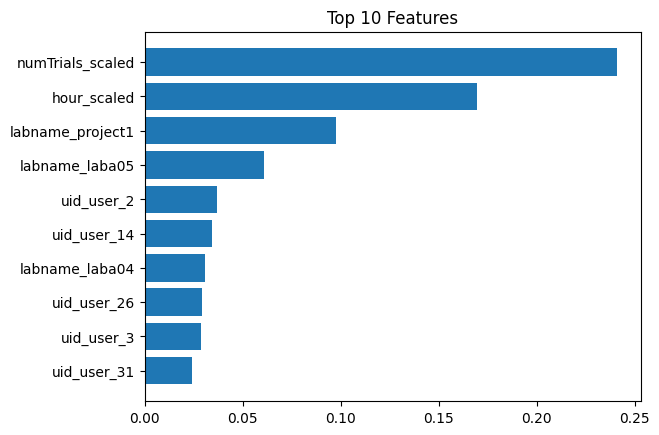

In [19]:
importance = best_model.feature_importances_
features = X.columns
top_indices = np.argsort(importance)[-10:]
plt.barh(features[top_indices], importance[top_indices])
plt.title('Top 10 Features')
plt.show()

In [21]:
joblib.dump(best_model, 'data/best_model.pkl')
loaded_model = joblib.load('data/best_model.pkl')

In [22]:
y_loaded_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, y_loaded_pred)
print(f'Точность загруженной модели: {loaded_accuracy}')

Точность загруженной модели: 0.8550295857988166
